In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import librosa
from librosa import display
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob 
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.optimizers import *
from sklearn.metrics import confusion_matrix


Using TensorFlow backend.


In [ ]:
#Loading the data and splitting it into training and test
path_ = 'gdrive/My Drive/DT2119 Speech Speaker Recognition/Project/'
data_actor_all = np.load(path_+"Data_Actor_All_13.npy", allow_pickle=True)
mfccs, label_emotions, label_actors = zip(*data_actor_all)


X = np.asarray(mfccs)
Y = np.asarray(label_emotions)
Xtr, Xtst, Ytr, Ytst = train_test_split(X, Y, test_size=0.10, shuffle = True, random_state = 60)
Xtr, Xval, Ytr, Yval = train_test_split(Xtr, Ytr, test_size=0.20, shuffle = True, random_state = 60)


Xtr = np.expand_dims(Xtr, axis=2)
Xtst = np.expand_dims(Xtst, axis=2)
Xval = np.expand_dims(Xval, axis=2)



In [ ]:
print(X.shape)
print(Xtr.shape)
print(Ytr.shape)
print(Xval.shape)
print(Yval.shape)
print(Xtst.shape)
print(Ytst.shape)

(1440, 13)
(1036, 13, 1)
(1036,)
(260, 13, 1)
(260,)
(144, 13, 1)
(144,)


In [ ]:
model = models.Sequential()
model.add(layers.Conv1D(128, 8,padding='same',
                 input_shape=(Xtr.shape[1],1)))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling1D(pool_size=(5)))
model.add(layers.Conv1D(256, 8,padding='same',))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(pool_size=(5)))
model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.Activation('relu'))
model.add(layers.Dense(256))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(8))
model.add(layers.Activation('softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_46 (Conv1D)           (None, 40, 128)           1152      
_________________________________________________________________
activation_64 (Activation)   (None, 40, 128)           0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 8, 128)            0         
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 8, 256)            262400    
_________________________________________________________________
activation_65 (Activation)   (None, 8, 256)            0         
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 1, 256)          

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(lr=0.00003,rho=0.9, decay=0.0), metrics=['accuracy'])
cnnhistory=model.fit(Xtr, Ytr, batch_size=16, epochs=700, validation_data=(Xval, Yval)) 

Epoch 1/700
58/58 [==============================] - 1s 26ms/step - loss: 6.9724 - accuracy: 0.1303 - val_loss: 2.0763 - val_accuracy: 0.1472
Epoch 2/700
58/58 [==============================] - 1s 23ms/step - loss: 5.0760 - accuracy: 0.1281 - val_loss: 2.2691 - val_accuracy: 0.1429
Epoch 3/700
58/58 [==============================] - 1s 23ms/step - loss: 4.1549 - accuracy: 0.1314 - val_loss: 2.1299 - val_accuracy: 0.1515
Epoch 4/700
58/58 [==============================] - 1s 23ms/step - loss: 3.6504 - accuracy: 0.1379 - val_loss: 2.0991 - val_accuracy: 0.1212
Epoch 5/700
58/58 [==============================] - 1s 23ms/step - loss: 3.1453 - accuracy: 0.1433 - val_loss: 1.9831 - val_accuracy: 0.2554
Epoch 6/700
58/58 [==============================] - 1s 23ms/step - loss: 3.0102 - accuracy: 0.1325 - val_loss: 2.1152 - val_accuracy: 0.1212
Epoch 7/700
58/58 [==============================] - 1s 23ms/step - loss: 2.7525 - accuracy: 0.1433 - val_loss: 1.9496 - val_accuracy: 0.2338
Epoch 

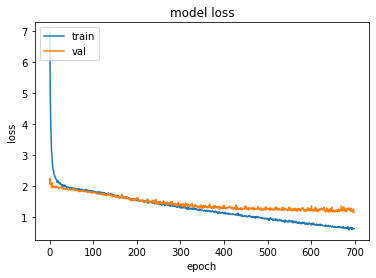

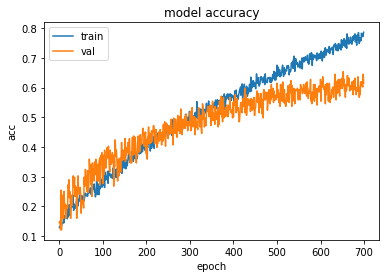

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(Xtst,  Ytst, verbose=2)

9/9 - 0s - loss: 1.2687 - accuracy: 0.5660


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


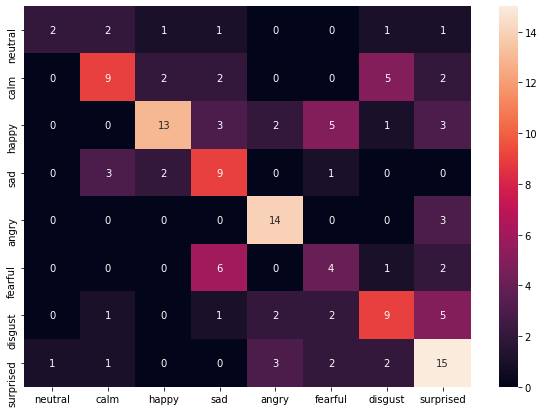

In [ ]:
# Plot non-normalized confusion matrix
import seaborn as sn


from sklearn.metrics import plot_confusion_matrix

class_names = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

#disp = plot_confusion_matrix(arrayyy, Xtst, Ytst, display_labels=class_names)
                              
#disp.ax_.set_title(title)

#print(title)
#print(disp.confusion_matrix)

#plt.show()


df_cm = pd.DataFrame(arrayyy, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [ ]:
#Implement SVM

X = np.asarray(mfccs)
Y = np.asarray(label_emotions)
#Xtr, Xtst, Ytr, Ytst = train_test_split(X, Y, test_size=0.10, shuffle = True)
Xtr, Xtst, Ytr, Ytst = train_test_split(X, Y, test_size=0.20, shuffle = True, random_state = 60)


from sklearn.svm import SVC
from sklearn import metrics

clf = SVC(kernel='linear')
clf.fit(Xtr, Ytr) 

X = Xtr
y = Ytr

preds = clf.predict(Xtst)

metrics.accuracy_score(Ytst, preds)

0.4131944444444444

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X = np.asarray(mfccs)
Y = np.asarray(label_emotions)
#Xtr, Xtst, Ytr, Ytst = train_test_split(X, Y, test_size=0.10, shuffle = True)
acc = []

for i in range(1,30,1):
  clf = RandomForestClassifier(criterion='gini', max_depth=i, random_state=42)
  clf.fit(Xtr, Ytr)
  preds = clf.predict(Xtst)
  print('acc with max depth as '+str(i)+': '+str(metrics.accuracy_score(Ytst, preds)))
  acc.append(metrics.accuracy_score(Ytst, preds))

acc with max depth as 1: 0.24305555555555555
acc with max depth as 2: 0.2881944444444444
acc with max depth as 3: 0.3298611111111111
acc with max depth as 4: 0.3645833333333333
acc with max depth as 5: 0.3923611111111111
acc with max depth as 6: 0.4236111111111111
acc with max depth as 7: 0.4270833333333333
acc with max depth as 8: 0.4791666666666667
acc with max depth as 9: 0.4722222222222222
acc with max depth as 10: 0.4861111111111111
acc with max depth as 11: 0.5243055555555556
acc with max depth as 12: 0.53125
acc with max depth as 13: 0.5833333333333334
acc with max depth as 14: 0.5347222222222222
acc with max depth as 15: 0.5451388888888888
acc with max depth as 16: 0.5555555555555556
acc with max depth as 17: 0.5277777777777778
acc with max depth as 18: 0.53125
acc with max depth as 19: 0.53125
acc with max depth as 20: 0.5347222222222222
acc with max depth as 21: 0.5347222222222222
acc with max depth as 22: 0.5486111111111112
acc with max depth as 23: 0.5520833333333334
acc wi

Text(0, 0.5, 'accuracy')

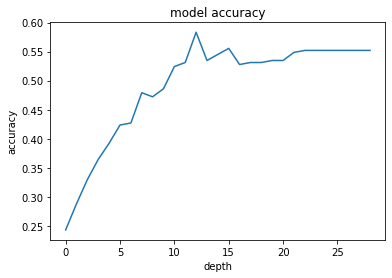

In [ ]:
plt.plot(acc)
plt.title('model accuracy')
plt.xlabel('depth')
plt.ylabel('accuracy')